# Reading The Data
- Using pynwb

In [2]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count

# Exploring functionalies of nwb module

In [3]:
#!pip install nwbwidgets
from nwbwidgets import nwb2widget

io = NWBHDF5IO("../M440957/sub-440957_ses-20190211T143614_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

# nwb2widget(nwbfile)

#Suppose to give overall structure of nwb file but encountering unexpected error.

In [4]:
nwbfile.subject

subject pynwb.file.Subject at 0x2017435143136
Fields:
  age__reference: birth
  date_of_birth: 2018-10-09 00:00:00-05:00
  description: SC016
  sex: M
  species: Mus musculus
  subject_id: 440957

In [5]:
import glob
nwb_files = glob.glob("..\M440957\*.nwb")
nwb_io = []

for name in nwb_files:
    io = NWBHDF5IO(name, mode="r").read()
    nwb_io.append(io)
    
trials_df = []
for i in range(len(nwb_files)):
    trials_df.append(nwb_io[i].trials.to_dataframe().drop(['trial','task','trial_uid', 'photostim_power','photostim_duration','auto_water', 'free_water'],axis=1))
    trials_df[i]['ses_no'] = i+1

In [6]:
trials_df[2]

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no
id,,,,,,,,
0,0.0000,5.2512,N/A,1,right,early,hit,3
1,9.4959,14.3958,N/A,1,right,no early,hit,3
2,16.1851,20.9083,N/A,1,right,no early,hit,3
3,22.6976,27.5231,N/A,1,right,no early,ignore,3
4,29.3136,34.2297,N/A,1,right,no early,hit,3
...,...,...,...,...,...,...,...,...
496,3487.0914,3491.8707,N/A,1,right,no early,hit,3
497,3494.1904,3499.0391,N/A,1,right,no early,hit,3
498,3501.9728,3505.9265,N/A,1,left,no early,miss,3


In [7]:
units_df = []
for i in range(len(nwb_files)):
    units_df.append(nwb_io[i].units.to_dataframe().query("classification == 'good'").reset_index())
    units_df[i]['ses_no'] = i+1

In [8]:
units_df[2]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no
0,4,4,30000,good,59.0,0.0,406.947115,19.863375,0.000000,3.037950,...,good,Dorsal peduncular area,"[True, True, True, True, True, True, True, Tru...","[0.2593131190814475, 0.5323148139669702, 0.702...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[10.451923076923077, 9.947115384615385, 9.7596...",[nan],3
1,14,15,30000,good,11.0,180.0,109.976708,5.275242,0.073159,4.653290,...,good,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[0.25401308617707663, 0.35208036167807855, 0.4...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[-0.016983695652173912, -0.19652562111801242, ...",[nan],3
2,91,98,30000,good,43.0,1060.0,61.662834,2.976889,0.006073,10.119800,...,good,"Prelimbic area, layer 6b","[True, True, True, True, True, True, True, Tru...","[0.0529451712137714, 0.07537864382158022, 0.10...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.0679183467741935, 1.3112714213709677, 1.240...",[nan],3
3,95,102,30000,good,43.0,1100.0,104.672281,5.831190,0.014125,2.355700,...,good,"Prelimbic area, layer 6b","[True, True, True, True, True, True, True, Tru...","[0.08804538912762405, 3.566700319110314, 10.15...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.3367491883116882, 1.1515827922077921, 0.895...",[nan],3
4,102,109,30000,good,11.0,1140.0,248.184540,12.069299,0.000000,2.058930,...,good,"Prelimbic area, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.1536791299370983, 0.3191468238823649, 1.450...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.0469094162995596, 1.9797976321585904, 1.778...",[nan],3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,927,346,30000,good,43.0,660.0,125.645380,2.642676,0.035332,4.761540,...,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[0.052021259272768905, 0.40975928294510444, 0....","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.519116531850354, 2.3508594539939334, 1.9408...",[nan],3
166,941,360,30000,good,27.0,1160.0,98.288499,2.642417,0.000000,0.329643,...,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[1.8037108925173861, 18.189753021328954, 26.13...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.6349871134020617, 1.5101481958762886, 1.872...",[nan],3
167,942,361,30000,good,43.0,1300.0,145.210701,5.814128,0.026635,8.970930,...,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[0.050587907146612654, 0.21105667773537728, 1....","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.31960227272727276, 0.6297348484848485, 0.63...",[nan],3
168,951,370,30000,good,59.0,1760.0,138.066665,6.520817,0.028408,4.732630,...,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[1.7526102225313918, 2.269717002370093, 2.2909...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.492561037639878, 2.2030773143438456, 2.4987...",[nan],3


# Data Cleaning

In [9]:
import ast

In [10]:
units_df[2].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions']).value_counts()

left Striatum     58
right ALM         56
right Striatum    56
Name: electrodes, dtype: int64

In [11]:
units_df[2]['anno_name'].unique()

array(['Dorsal peduncular area', 'Olfactory areas',
       'Prelimbic area, layer 6b', 'Prelimbic area, layer 6a',
       'Anterior cingulate area, dorsal part, layer 6a',
       'Secondary motor area, layer 6a', 'Secondary motor area, layer 5',
       'Secondary motor area, layer 2/3',
       'Bed nuclei of the stria terminalis', 'Striatum',
       'Lateral septal nucleus, ventral part', 'Caudoputamen',
       'Primary motor area, Layer 6a', 'Primary motor area, Layer 5',
       'Primary motor area, Layer 2/3',
       'Globus pallidus, external segment',
       'Primary somatosensory area, upper limb, layer 4'], dtype=object)

## Making Data Useable

In [12]:
pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = [],[],[],[],[],[],[],[]
for name in nwb_files:  
    with NWBHDF5IO(name, "r") as io:
        read_nwbfile = io.read()
        #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_start_times"].timestamps[:4])
        #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_stop_times"].timestamps[:4])
        pre_start.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"].timestamps[:])
        pre_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"].timestamps[:])
        sample_start.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"].timestamps[:])
        sample_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"].timestamps[:])
        delay_start.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:])
        delay_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"].timestamps[:])
        go_start.append(read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"].timestamps[:])
        go_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"].timestamps[:])
    
print(len(trials_df[0]), len(pre_stop[0]))
def Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop):
    for i in range(len(pre_start)):
        #sample_start[i] = np.intersect1d(sample_start[i], pre_stop[i])
        sample_stop[i] = np.intersect1d(sample_stop[i], delay_start[i])
        delay_start[i] = np.intersect1d(delay_start[i], sample_stop[i])
        delay_stop[i] = np.intersect1d(delay_stop[i], go_start[i])
    return pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop

pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop)

520 520


In [13]:
len(sample_start[0])

523

In [14]:
for i in range(len(nwb_files)):
    trials_df[i] = trials_df[i].assign(pre_start = pre_start[i],
                             pre_stop = pre_stop[i],
                             sample_start = pre_stop[i],
                             sample_stop = sample_stop[i],
                             delay_start = delay_start[i],
                             delay_stop = delay_stop[i],
                             go_start = go_start[i],
                             go_stop = go_stop[i])
    units_df[i]['Region'] = units_df[i].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions'])
units_df[3]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
0,10,10,30000,good,43.0,60.0,234.027192,11.235598,0.000000,0.253105,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[4.370135287246349, 65.84457375926293, 267.445...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",l...,18005106822 1-301 pynwb.ecephys.ElectrodeGroup...,"[5.991779089376054, 4.956260539629005, 4.30807...",[nan],4,left ALM
1,13,13,30000,multi,27.0,80.0,169.641488,8.755143,1.000000,0.868795,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[33.056840288453124, 33.06260693412824, 47.583...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",l...,18005106822 1-301 pynwb.ecephys.ElectrodeGroup...,"[3.911042944785276, 3.5400690184049077, 3.3588...",[nan],4,left ALM
2,19,20,30000,good,43.0,180.0,100.109475,5.155103,0.007412,2.812110,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.3379499650729523, 0.5809157473036777, 0.728...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",l...,18005106822 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.953125, 1.8635549363057324, 1.8759952229299...",[nan],4,left ALM
3,26,27,30000,good,43.0,380.0,148.788061,6.542332,0.000000,1.996030,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[1.0832472520666117, 1.4161460402595396, 2.994...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",l...,18005106822 1-301 pynwb.ecephys.ElectrodeGroup...,"[-1.6977163461538463, -1.4147636217948718, -1....",[nan],4,left ALM
4,29,30,30000,good,11.0,420.0,128.565254,5.743233,0.001600,6.035680,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.01571780471838835, 0.028517758124424475, 0....","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",l...,18005106822 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.5969198258196722, 1.3447745901639345, 0.943...",[nan],4,left ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,841,382,30000,good,59.0,1040.0,109.303524,2.807413,0.022653,2.807820,...,Reticular nucleus of the thalamus,"[True, True, True, True, True, True, True, Tru...","[0.2056997626984458, 0.24780006333099625, 1.26...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.3116688829787234, 0.012466755319148936, -0....",[nan],4,right Striatum
143,842,383,30000,good,59.0,1080.0,105.651781,4.332374,0.027759,6.728340,...,Reticular nucleus of the thalamus,"[True, True, True, True, True, True, True, Tru...","[0.40710120087886903, 0.5645689920017283, 1.88...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[-3.5631655679513186, -4.114636156186613, -4.0...",[nan],4,right Striatum
144,851,392,30000,good,11.0,2140.0,250.917081,12.247531,0.048238,1.125730,...,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[193.43168713564037, 193.43638716920267, 193.4...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[5.547762784090908, 5.462535511363636, 5.26544...",[nan],4,right Striatum
145,863,404,30000,good,11.0,3780.0,113.764671,3.888919,0.083674,1.508800,...,"Primary somatosensory area, lower limb, layer 2/3","[True, True, True, True, True, True, True, Tru...","[0.45976824363376245, 0.5964025526542116, 0.96...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.8819640837104075, 2.6672087104072397, 2.725...",[nan],4,right Striatum


In [16]:
#Aggregating Data
trial_result = pd.DataFrame()
unit_result = pd.DataFrame()
for i in range(len(nwb_files)):
    trial_result = pd.concat([trial_result, trials_df[i]])
    unit_result = pd.concat([unit_result, units_df[i]])
trial_result

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
0,0.0000,3.4944,N/A,1,left,no early,miss,1,0.5000,1.3128,1.3128,1.9628,1.9628,3.1628,3.1628,4.6628
1,5.7592,10.7399,N/A,1,left,no early,hit,1,6.2592,7.1361,7.1361,7.7861,7.7861,8.9861,8.9861,10.4861
2,15.3907,19.1559,N/A,1,left,early,miss,1,15.8907,16.6425,16.6425,17.6908,17.6908,18.8908,18.8908,20.3908
3,21.0050,24.6530,N/A,1,left,early,miss,1,21.5050,22.2935,22.2935,23.1705,23.1705,24.3705,24.3705,25.8705
4,26.8577,31.6944,N/A,1,left,no early,hit,1,27.3577,28.0306,28.0306,28.6806,28.6806,29.8806,29.8806,31.3806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,4644.8040,4649.8138,N/A,1,left,no early,hit,4,4645.3040,4646.1505,4646.1505,4646.8005,4646.8005,4648.0005,4648.0005,4649.5005
656,4652.3465,4657.1388,1.934,1,right,no early,hit,4,4652.8465,4653.6302,4653.6302,4654.2802,4654.2802,4655.4802,4655.4802,4656.9802
657,4659.6663,4664.6301,N/A,1,left,no early,hit,4,4660.1663,4661.0573,4661.0573,4661.7073,4661.7073,4662.9073,4662.9073,4664.4073


In [19]:
units_df_ag = unit_result
trials_df_ag = trial_result
units_df_ag['Region'].unique()

array(['left ALM', 'right ALM', 'left Striatum', 'right Striatum'],
      dtype=object)

## Spike Rate Plotting

In [20]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'right ALM' and classification == 'good'")

In [21]:
units_Data

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
172,608,6,30000,good,11.0,20.0,164.173565,5.540986,0.000000,0.870779,...,"Orbital area, lateral part, layer 2/3","[True, True, True, True, True, True, True, Tru...","[0.3805160599872055, 0.7997519960769757, 1.164...","[[0.0, 3.4944], [5.7592, 10.7399], [15.3907, 1...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[0.5923450789793439, 0.49267162818955046, -0.0...",[nan],1,right ALM
173,609,7,30000,good,11.0,20.0,449.360795,20.299184,0.000000,0.133966,...,"Orbital area, lateral part, layer 2/3","[True, True, True, True, True, True, True, Tru...","[15.766080600700397, 110.5095273586032, 110.51...","[[0.0, 3.4944], [5.7592, 10.7399], [15.3907, 1...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[9.61122776679842, 9.398159584980238, 9.865983...",[nan],1,right ALM
174,616,16,30000,good,59.0,120.0,62.533299,3.011460,0.000000,1.211250,...,"Orbital area, lateral part, layer 2/3","[True, True, True, True, True, True, True, Tru...","[9.952005996666395, 10.000839633175223, 10.582...","[[0.0, 3.4944], [5.7592, 10.7399], [15.3907, 1...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[0.47643442622950816, 0.4047131147540983, 0.20...",[nan],1,right ALM
175,621,21,30000,good,43.0,60.0,259.829384,10.781125,0.006555,3.329290,...,"Orbital area, lateral part, layer 2/3","[True, True, True, True, True, True, True, Tru...","[0.22101506975189134, 2.221260821277599, 2.427...","[[0.0, 3.4944], [5.7592, 10.7399], [15.3907, 1...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[0.20096203512396696, -0.11137654958677687, 0....",[nan],1,right ALM
176,625,25,30000,good,11.0,100.0,110.295979,5.215150,0.118454,1.175780,...,"Orbital area, lateral part, layer 2/3","[True, True, True, True, True, True, True, Tru...","[0.8125187420038564, 8.714698315047873, 43.054...","[[0.0, 3.4944], [5.7592, 10.7399], [15.3907, 1...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[-0.14236501687289088, -0.23991141732283464, 0...",[nan],1,right ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,423,57,30000,good,11.0,2060.0,270.098055,12.074970,0.000657,9.410000,...,"Secondary motor area, layer 5","[True, True, True, True, True, True, True, Tru...","[1.288561153152307, 1.3900289091869489, 1.4729...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",...,18005108721 1-301 pynwb.ecephys.ElectrodeGroup...,"[3.900669642857143, 4.036989795918368, 4.05133...",[nan],4,right ALM
79,429,63,30000,good,43.0,2100.0,205.517875,9.479735,0.000000,8.413180,...,"Secondary motor area, layer 5","[True, True, True, True, True, True, True, Tru...","[0.015714154406309966, 0.0394810762370259, 0.0...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",...,18005108721 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.6853131338742395, 1.4713805780933065, 1.345...",[nan],4,right ALM
80,434,68,30000,good,59.0,2160.0,213.331991,9.179354,0.000000,6.001240,...,"Secondary motor area, layer 5","[True, True, True, True, True, True, True, Tru...","[0.12614867337568292, 0.22651641760048769, 0.3...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",...,18005108721 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.174291237113402, 0.9447487113402062, 0.7031...",[nan],4,right ALM
81,453,87,30000,good,11.0,1700.0,114.960572,5.273235,0.015898,4.723570,...,"Secondary motor area, layer 6a","[True, True, True, True, True, True, True, Tru...","[12.759308281916455, 12.856009320108472, 13.23...","[[0.0, 6.6861], [8.5182, 13.739], [17.0211, 22...",...,18005108721 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.20200545171339562, 0.3090926791277258, 0.52...",[nan],4,right ALM


# New data based on Delay range [1.0,1.2]




In [22]:
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")
trials_Data

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
1,5.7592,10.7399,N/A,1,left,no early,hit,1,6.2592,7.1361,7.1361,7.7861,7.7861,8.9861,8.9861,10.4861
4,26.8577,31.6944,N/A,1,left,no early,hit,1,27.3577,28.0306,28.0306,28.6806,28.6806,29.8806,29.8806,31.3806
7,45.3469,50.4085,N/A,1,left,no early,hit,1,45.8469,46.7290,46.7290,47.3790,47.3790,48.5790,48.5790,50.0790
8,53.5755,58.4963,N/A,1,left,no early,hit,1,54.0755,54.8763,54.8763,55.5263,55.5263,56.7263,56.7263,58.2263
9,60.8938,65.6848,N/A,1,right,no early,hit,1,61.3938,62.1924,62.1924,62.8424,62.8424,64.0424,64.0424,65.5424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,4600.5844,4605.4668,N/A,1,left,no early,hit,4,4601.0844,4601.9069,4601.9069,4602.5569,4602.5569,4603.7569,4603.7569,4605.2569
650,4607.9098,4612.8187,N/A,1,left,no early,hit,4,4608.4098,4609.2532,4609.2532,4609.9032,4609.9032,4611.1032,4611.1032,4612.6032
652,4623.6784,4628.7257,N/A,1,left,no early,hit,4,4624.1784,4625.0216,4625.0216,4625.6716,4625.6716,4626.8716,4626.8716,4628.3716


# Plotting with phases

In [23]:
def get_smooth_gauss(spike_data,sigma,color,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(1001)/200) - 1)
    freq = (hist/len(dataset))*200
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    plt.plot(edges[1:],smooth_gauss,color=color)
    #plt.plot(edges[1:],freq)
    
    #return freq,edges[1:],smooth_gauss
    
def return_smooth_gauss(spike_data,sigma,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(1001)/200) - 1)
    freq = (hist/len(dataset))*200
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    
    return freq,edges[1:],smooth_gauss

In [24]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

# def get_firing_rate_graph(Trial_Data1,Trial_Data2,sigma):
#     after = 4.35
#     before = -0.7
#     spike_data = []
    
#     for unit in units_Data.reset_index()['id'][:20]:
#         unit_spike_times = units_Data["spike_times"][unit]
#         trial_spikes_l = []
#         trial_spikes_r = []
#         i = 0
#         for time in Trial_Data1['sample_start']:
#             # Compute spike times relative to stimulus onset
#             aligned_spikes1 = unit_spike_times - time
#             # Keep only spike times in a given time window around the stimulus onset
#             aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
#             aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
#             trial_spikes_l.append(aligned_spikes1)
            
#         for time in Trial_Data2['sample_start']:
#             # Compute spike times relative to stimulus onset
#             aligned_spikes = unit_spike_times - time
#             # Keep only spike times in a given time window around the stimulus onset
#             aligned_spikes = aligned_spikes[aligned_spikes < after ]
#             aligned_spikes = aligned_spikes[before < aligned_spikes]
#             trial_spikes_r.append(aligned_spikes)            
            
#         fig, axs = plt.subplots(1, 1, sharex="all")
        
        
#         plt.xlabel("time (s)")
        
#         get_smooth_gauss(trial_spikes_l,sigma,'r',trials_Data_L)
#         get_smooth_gauss(trial_spikes_r,sigma,'b',trials_Data_R)
#         axs.set_ylabel("Freq (Hz)")
#         axs.axvline(0, color=[0.5, 0.5, 0.5])
#         axs.axvline(0.65, color=[0.5, 0.5, 0.5])
#         axs.axvline(1.85, color=[0.5, 0.5, 0.5])
#         axs.axvline(3.35, color=[0.5, 0.5, 0.5])
        
#         axs.text(0.1,0,'Sample',rotation=90)
#         axs.text(0.75,0,'Delay',rotation=90)
#         axs.text(1.95,0,'Go',rotation=90)
#         axs.text(-0.4,0,'Pre-Sample',rotation=90)
# get_firing_rate_graph(trials_Data_L,trials_Data_R,0.05)

In [25]:
len(trials_Data_L),len(trials_Data_R)

(841, 688)

In [26]:
def get_firing_rate_over_neurons(Trial_Data1,Trial_Data2,sigma):
    after = 4.3
    before = -0.7
    spike_data_l = []
    spike_data_r = []
    
    for session in range(1,len(nwb_files)+1):
        temp_data_l = Trial_Data1.query("ses_no == @session") 
        temp_data_r = Trial_Data2.query("ses_no == @session") 
        temp_unit = units_Data.query("ses_no == @session")
        for unit in temp_unit.reset_index()['index']:
            unit_spike_times = temp_unit["spike_times"][unit]
            trial_spikes_l = []
            trial_spikes_r = []
            i = 0
            for time in temp_data_l['sample_start']:
                # Compute spike times relative to stimulus onset
                aligned_spikes = unit_spike_times - time
                # Keep only spike times in a given time window around the stimulus onset
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_l.append(aligned_spikes)

            frq_l,edge,smooth_l = return_smooth_gauss(trial_spikes_l,sigma,temp_data_l)    
            spike_data_l.append(smooth_l)

            for time in temp_data_r['sample_start']:
                # Compute spike times relative to stimulus onset
                aligned_spikes = unit_spike_times - time
                # Keep only spike times in a given time window around the stimulus onset
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_r.append(aligned_spikes)

            frq_r,edge,smooth_r = return_smooth_gauss(trial_spikes_r,sigma,temp_data_r)    
            spike_data_r.append(smooth_r)    
        
    return spike_data_l,spike_data_r,edge

l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

In [27]:
# avg_left_rate = np.array(l).mean(axis=0)
# avg_right_rate = np.array(r).mean(axis=0)


# fig, axs = plt.subplots(1, 1, sharex="all")
# axs.plot(edges,avg_left_rate,c='r')
# axs.plot(edges,avg_right_rate,c='b')
# axs.axvline(0, color=[0.5, 0.5, 0.5])
# axs.axvline(0.65, color=[0.5, 0.5, 0.5])
# axs.axvline(1.85, color=[0.5, 0.5, 0.5])
# axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,0,'Sample',rotation=90)
# axs.text(0.75,0,'Delay',rotation=90)
# axs.text(1.95,0,'Go',rotation=90)
# axs.text(-0.4,0,'Pre-Sample',rotation=90)
# axs.set_ylabel("Freq (Hz)")
# axs.legend(['Left','Right'])
# plt.show()

In [28]:
diff_cd = (-np.array(l)+np.array(r))

delay_avg_diff = diff_cd[:,449:570].mean(axis=1)
response_avg_diff = diff_cd[:,569:690].mean(axis=1)

newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)

In [29]:
#Delay period CD Apply (Yet to finish)    (**FINISHED**)
# diff_cd = (np.array(l)-np.array(r)).mean(axis=1)
# newly_l = np.array(l).T.dot(diff_cd)
# newly_r = np.array(r).T.dot(diff_cd)

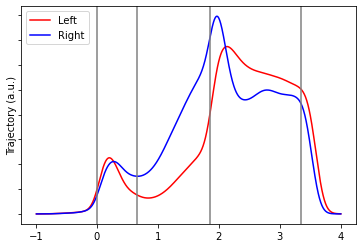

In [30]:
fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

# For Striatum

In [31]:
units_df_ag['Region'].unique()

array(['left ALM', 'right ALM', 'left Striatum', 'right Striatum'],
      dtype=object)

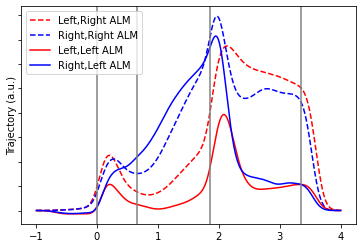

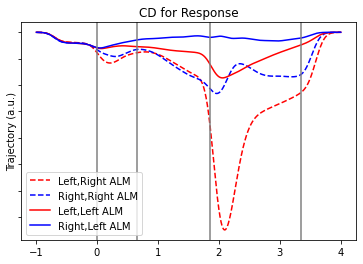

In [32]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'left ALM' and classification == 'good'")

trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

st_l,st_r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

diff_cd = (-np.array(st_l)+np.array(st_r))
delay_avg_diff_lalm = diff_cd[:,449:569].mean(axis=1)
response_avg_diff_lalm = diff_cd[:,569:690].mean(axis=1)
newly_l_st = np.array(st_l).T.dot(delay_avg_diff_lalm)
newly_r_st = np.array(st_r).T.dot(delay_avg_diff_lalm)

fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left,Right ALM','Right,Right ALM','Left,Left ALM','Right,Left ALM'])
plt.show()

newly_l_st = np.array(st_l).T.dot(response_avg_diff_lalm)
newly_r_st = np.array(st_r).T.dot(response_avg_diff_lalm)
newly_l = np.array(l).T.dot(response_avg_diff)
newly_r = np.array(r).T.dot(response_avg_diff)

fig, axs = plt.subplots(1, 1, sharex="all")
plt.title('CD for Response')
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left,Right ALM','Right,Right ALM','Left,Left ALM','Right,Left ALM'])
plt.show()

In [33]:
from numpy import arccos, array
from numpy.linalg import norm
import math
def angles(u, v): 
    return arccos(u.dot(v)/(norm(u)*norm(v)))
print(math.degrees(angles(delay_avg_diff, response_avg_diff)), math.degrees(angles(delay_avg_diff_lalm, response_avg_diff_lalm)))

88.9837329570207 67.20384721728854


# Distribution during delay and go phase

In [30]:
def get_phases_rate_graph(Trial_Data1,Trial_Data2,sigma):

    spike_data = []
    
    for unit in units_Data.reset_index().id:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_go_l = []
        trial_spikes_go_r = []
        trial_spikes_delay_l = []
        trial_spikes_delay_r = []
        trial_sample_l = []
        trial_sample_r = []
        
    
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_l.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_l.append(aligned_spikes1)
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_r.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_r.append(aligned_spikes1)        
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_r.append(aligned_spikes1)   
              
    return trial_sample_l, trial_sample_r, trial_spikes_go_l,trial_spikes_go_r,trial_spikes_delay_l,trial_spikes_delay_r     

def get_freq_edge(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(31)/20) + 1.80)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_1(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(25)/20) + 0.60)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_2(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(14)/20) + 0)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]


sample_l, sample_r, go_l,go_r,delay_l,delay_r = get_phases_rate_graph(trials_Data_L,trials_Data_R,0.1)
freq_sample_l,edges2 = get_freq_edge_2(sample_l,trials_Data_L)
freq_sample_r,edges2 = get_freq_edge_2(sample_r,trials_Data_R)
freq_go_l,edges = get_freq_edge(go_l,trials_Data_L)
freq_go_r,edges = get_freq_edge(go_r,trials_Data_R)
freq_delay_l,edges1 = get_freq_edge_1(delay_l,trials_Data_L)
freq_delay_r,edges1 = get_freq_edge_1(delay_r,trials_Data_R)

<AxesSubplot:ylabel='Density'>

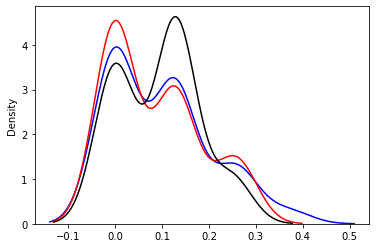

In [31]:
#Delay vs Go(Phases vs Phases)(Yet to finish)
sns.kdeplot(list(freq_go_l) + list(freq_go_r), c='b')
sns.kdeplot(list(freq_delay_l) + list(freq_delay_r), c='r')
sns.kdeplot(list(freq_sample_l) + list(freq_sample_r), c='black')

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.        , 0.01234568, 0.02469136, 0.03703704, 0.04938272,
        0.0617284 , 0.07407407, 0.08641975, 0.09876543, 0.11111111,
        0.12345679, 0.13580247, 0.14814815, 0.16049383, 0.17283951,
        0.18518519, 0.19753086, 0.20987654, 0.22222222, 0.2345679 ,
        0.24691358]),
 <BarContainer object of 20 artists>)

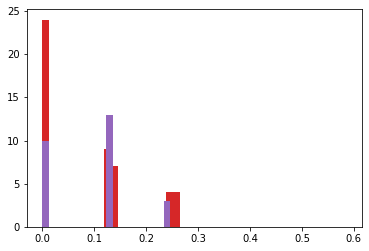

In [32]:
plt.hist(list(freq_go_r) + list(freq_go_l), bins=20)
plt.hist(list(freq_delay_r) + list(freq_delay_l), bins=20)
plt.hist(list(freq_sample_r) + list(freq_sample_l), bins=20)